### Reading startup.data

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

df = pd.read_csv('startup_data_150.csv')

#By setting this option to None, you're telling Pandas to display all columns in the DataFrame.
pd.set_option('display.max_columns', None)

df.head()

,Startup_Name,Location,Industry
0,100Art,"Kolkata,West Bengal",Fashion
1,Priyanshu sinha,"Delhi,Delhi",NaN
2,SOLVBIZ TAXCOM TECHNOLOGIES LLP,"Kolkata,West Bengal",Professional & Commercial Services
3,God's Eye,"Kolkata,West Bengal",Internet of Things
4,Altaswiq Agencia,"Buxar,Bihar",Marketing


### Analysing the imported Dataframe

In [75]:
df.shape
df.nunique()

Startup_Name    1351
Location         329
Industry          51
dtype: int64

In [49]:
# Check for empty values in the entire DataFrame
empty_values_df = df.isna()
print(empty_values_df)

      Startup_Name  Location  Industry
0            False     False     False
1            False     False      True
2            False     False     False
3            False     False     False
4            False     False     False
...            ...       ...       ...
1354         False     False     False
1355         False     False      True
1356         False     False     False
1357         False     False     False
1358         False     False     False

[1359 rows x 3 columns]


In [50]:
#Startup_Name, Location has no null values while Industry has 149 Null values in dataframe df
null_counts = df['Industry'].isnull().sum()
print(null_counts)

149


In [51]:
dfl=df['Location']
dfl.head()

0    Kolkata,West Bengal
1            Delhi,Delhi
2    Kolkata,West Bengal
3    Kolkata,West Bengal
4            Buxar,Bihar
Name: Location, dtype: object

In [52]:
unique_locations = df['Location'].unique()
print(len(unique_locations))

329


In [53]:
location_frequency = dfl.value_counts()   # pd series
#print(location_frequency)

# Create a DataFrame from the location_frequency data
data = {'Location': location_frequency.index, 'Frequency': location_frequency.values}
df_co = pd.DataFrame(data)
#df_co.shape
print(df_co)


                Location  Frequency
0       Pune,Maharashtra         55
1     Mumbai,Maharashtra         54
2    Bengaluru,Karnataka         49
3      Ahmedabad,Gujarat         47
4     Chennai,Tamil Nadu         46
..                   ...        ...
324      Bathinda,Punjab          1
325      Navsari,Gujarat          1
326          Buxar,Bihar          1
327     Beed,Maharashtra          1
328  Banaskantha,Gujarat          1

[329 rows x 2 columns]


In [54]:
# Split the "Location" column into two columns using a comma as the separator
df_co[['City', 'State/UT']] = df_co['Location'].str.split(',', expand=True)
df_co.head()


,Location,Frequency,City,State/UT
0,"Pune,Maharashtra",55,Pune,Maharashtra
1,"Mumbai,Maharashtra",54,Mumbai,Maharashtra
2,"Bengaluru,Karnataka",49,Bengaluru,Karnataka
3,"Ahmedabad,Gujarat",47,Ahmedabad,Gujarat
4,"Chennai,Tamil Nadu",46,Chennai,Tamil Nadu


In [55]:
df_co.describe

<bound method NDFrame.describe of                 Location  Frequency         City     State/UT
0       Pune,Maharashtra         55         Pune  Maharashtra
1     Mumbai,Maharashtra         54       Mumbai  Maharashtra
2    Bengaluru,Karnataka         49    Bengaluru    Karnataka
3      Ahmedabad,Gujarat         47    Ahmedabad      Gujarat
4     Chennai,Tamil Nadu         46      Chennai   Tamil Nadu
..                   ...        ...          ...          ...
324      Bathinda,Punjab          1     Bathinda       Punjab
325      Navsari,Gujarat          1      Navsari      Gujarat
326          Buxar,Bihar          1        Buxar        Bihar
327     Beed,Maharashtra          1         Beed  Maharashtra
328  Banaskantha,Gujarat          1  Banaskantha      Gujarat

[329 rows x 4 columns]>

In [76]:
df_co.nunique()

Location     329
Frequency     28
City         310
State/UT      29
dtype: int64

In [57]:
states_freq= df_co['State/UT'].value_counts() 
print(states_freq)

State/UT
Uttar Pradesh                  34
Maharashtra                    32
Gujarat                        23
Rajasthan                      20
Karnataka                      20
Tamil Nadu                     19
Madhya Pradesh                 16
Kerala                         15
West Bengal                    15
Punjab                         15
Haryana                        14
Andhra Pradesh                 14
Jharkhand                      12
Delhi                          12
Bihar                          11
Odisha                         11
Assam                          10
Telangana                       8
Uttarakhand                     6
Chhattisgarh                    5
Jammu and Kashmir               5
Himachal Pradesh                4
Chandigarh                      2
Andaman and Nicobar Islands     1
Goa                             1
Manipur                         1
Nagaland                        1
Puducherry                      1
Tripura                         1
Name:

In [58]:
state_df = states_freq.to_frame()
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State', 'Count'] 
state_df.head()


,State,Count
0,Uttar Pradesh,34
1,Maharashtra,32
2,Gujarat,23
3,Rajasthan,20
4,Karnataka,20


## Importing India Map Shape File in a Json

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the geoJson into a GeoDataFrame
gdf = gpd.read_file('INDIA_STATES.geojson')
gdf.head()
#gdf.shape
#gdf.plot()

gdf_states=gdf[['STNAME','geometry']]
gdf_states['STNAME'] = gdf_states['STNAME'].str.title()
gdf_states.head()


/home/godfather/Documents/Projects/PyProjects/virtenv3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,STNAME,geometry
0,Arunachal Pradesh,"POLYGON ((96.09428 29.45477, 96.08208 29.46173..."
1,Assam,"POLYGON ((95.97166 27.96254, 95.82380 27.97157..."
2,Chandigarh,"POLYGON ((76.78275 30.78923, 76.77148 30.79527..."
3,Chhattisgarh,"POLYGON ((83.32988 24.10169, 83.32147 24.10603..."
4,Delhi,"POLYGON ((77.08754 28.87546, 77.08240 28.88381..."


In [60]:
gdf_states.at[20,"STNAME"] = "Andaman and Nicobar Islands" 
gdf_states.at[33,"STNAME"] = "Daman and Diu" 
gdf_states.at[34,"STNAME"] = "Dadra and Nagar Haveli" 
gdf_states.at[36,"STNAME"] = "Jammu and Kashmir" 

In [61]:
gdf_states

,STNAME,geometry
0,Arunachal Pradesh,"POLYGON ((96.09428 29.45477, 96.08208 29.46173..."
1,Assam,"POLYGON ((95.97166 27.96254, 95.82380 27.97157..."
2,Chandigarh,"POLYGON ((76.78275 30.78923, 76.77148 30.79527..."
3,Chhattisgarh,"POLYGON ((83.32988 24.10169, 83.32147 24.10603..."
4,Delhi,"POLYGON ((77.08754 28.87546, 77.08240 28.88381..."
5,Goa,"POLYGON ((73.85648 15.80076, 73.84674 15.78644..."
6,Haryana,"POLYGON ((76.82927 30.91668, 76.82238 30.92860..."
7,Himachal Pradesh,"POLYGON ((76.79929 33.25607, 76.77554 33.25363..."
8,Jharkhand,"POLYGON ((87.59180 25.34196, 87.58403 25.34945..."
9,Karnataka,"POLYGON ((77.32647 18.45884, 77.31994 18.45802..."


In [62]:
state_df.shape

(29, 2)

In [63]:
# Assuming you have a DataFrame named state_df
column_name = 'State'
search_string = 'Jammu'
filtered_rows = state_df[state_df[column_name].str.contains(search_string, case=False)]
print("Rows containing '", search_string, "' in column '", column_name, "':\n", filtered_rows)


Rows containing ' Jammu ' in column ' State ':
                 State  Count
20  Jammu and Kashmir      5


In [64]:
#Merging the data
merged = gdf_states.set_index('STNAME').join(state_df.set_index('State'))
merged.reset_index(level=0, inplace=True)
merged['Count'] = merged['Count'].replace(np.nan, 0)
merged

,STNAME,geometry,Count
0,Arunachal Pradesh,"POLYGON ((96.09428 29.45477, 96.08208 29.46173...",0.0
1,Assam,"POLYGON ((95.97166 27.96254, 95.82380 27.97157...",10.0
2,Chandigarh,"POLYGON ((76.78275 30.78923, 76.77148 30.79527...",2.0
3,Chhattisgarh,"POLYGON ((83.32988 24.10169, 83.32147 24.10603...",5.0
4,Delhi,"POLYGON ((77.08754 28.87546, 77.08240 28.88381...",12.0
5,Goa,"POLYGON ((73.85648 15.80076, 73.84674 15.78644...",1.0
6,Haryana,"POLYGON ((76.82927 30.91668, 76.82238 30.92860...",14.0
7,Himachal Pradesh,"POLYGON ((76.79929 33.25607, 76.77554 33.25363...",4.0
8,Jharkhand,"POLYGON ((87.59180 25.34196, 87.58403 25.34945...",12.0
9,Karnataka,"POLYGON ((77.32647 18.45884, 77.31994 18.45802...",20.0


## Finally Ploting the merged dataframe of startup location on India Map

<Axes: title={'center': 'Indian state-wise startups from Startup.gov.in'}>

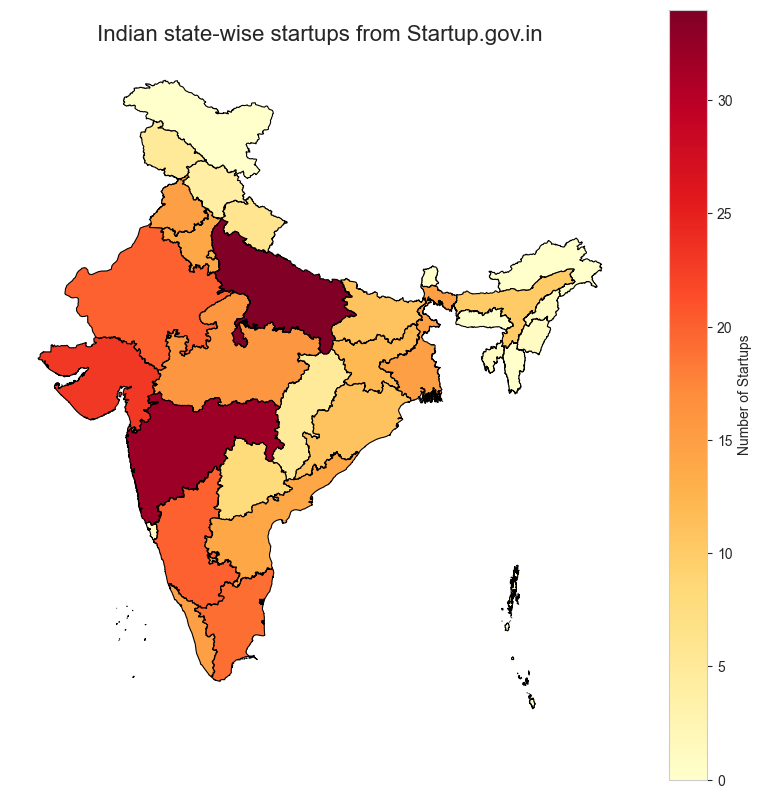

In [65]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Indian state-wise startups from Startup.gov.in', fontdict={'fontsize': '16', 'fontweight' : '10'})

# Plot the figure
merged.plot(column='Count',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', \
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of Startups"})

In [66]:
src: https://github.com/shankhanil007/Landslide-Analysis/blob/main/%20Landslide%20Analysis.ipynb

SyntaxError: invalid decimal literal (3431624126.py, line 1)

In [ ]:
india_state_df = pd.read_csv('state wise lat and long.csv')     # Reading the coordinates of Indian states for plotting purpose
india_state_df

In [ ]:
india_state_df.at[0,"State"] = "Andaman and Nicobar Islands"    # Renaming certaing entries to avoid conflicts while merging
india_state_df.at[25,"State"] = "Odisha"  
india_state_df.at[33,"State"] = "Uttarakhand"  

In [ ]:
# Merge the data
state_merged_df = gdf_states.set_index('STNAME').join(india_state_df.set_index('State'))
state_merged_df.reset_index(level=0, inplace=True)


In [ ]:
# Handling missng values
state_merged_df.at[19,"Latitude"] = 18.1124
state_merged_df.at[19,"Longitude"] = 79.0193
state_merged_df.at[35,"Latitude"] = 34.2268
state_merged_df.at[35,"Longitude"] = 77.5619

In [ ]:
state_merged_df.head()

### Exporting Geojson

In [ ]:
# Specify the file path for the GeoJSON file
geojson_file_path = 'Indiamap.geojson'

# Save the GeoDataFrame to a GeoJSON file
state_merged_df.to_file(geojson_file_path, driver='GeoJSON')

## Now Ploting Category of Startups

In [69]:
df

,Startup_Name,Location,Industry
0,100Art,"Kolkata,West Bengal",Fashion
1,Priyanshu sinha,"Delhi,Delhi",NaN
2,SOLVBIZ TAXCOM TECHNOLOGIES LLP,"Kolkata,West Bengal",Professional & Commercial Services
3,God's Eye,"Kolkata,West Bengal",Internet of Things
4,Altaswiq Agencia,"Buxar,Bihar",Marketing
...,...,...,...
1354,NEXSEC GLOBAL PRIVATE LIMITED,"Ernakulam,Kerala",IT Services
1355,SOLEQUIP TAAPMAN LLP,",Maharashtra",NaN
1356,AVELORE APPAREL PRIVATE LIMITED,"Pune,Maharashtra",Textiles & Apparel
1357,ZAYD CROP SCIENCE,"Banaskantha,Gujarat",Agriculture


In [24]:
df['Industry'].nunique()

51

In [83]:
df_indu = df['Industry'].value_counts()
df_ind = {'Category': df_indu.index, 'Frequency': df_indu.values}
df_ind = pd.DataFrame(df_ind)
df_ind.head()

,Category,Frequency
0,IT Services,106
1,Food & Beverages,94
2,Healthcare & Lifesciences,87
3,Education,71
4,Professional & Commercial Services,65


In [96]:
df_ind['Percentage'] = (df_ind['Frequency'] / df_ind['Frequency'].sum()) * 100
df_ind.head()
sampl = df_ind.head(10)

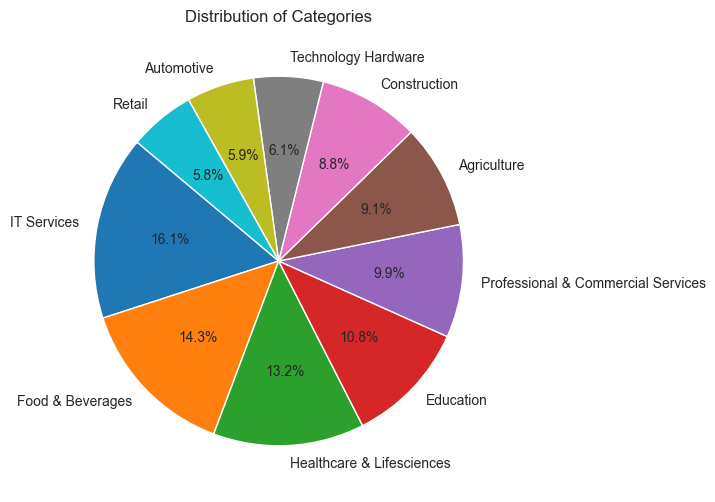

In [100]:
# Plot a pie chart for top 10 category
plt.figure(figsize=(8, 6))
plt.pie(sampl['Frequency'], labels=sampl['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('off')  
plt.show()